Dataset loaded successfully!
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHour

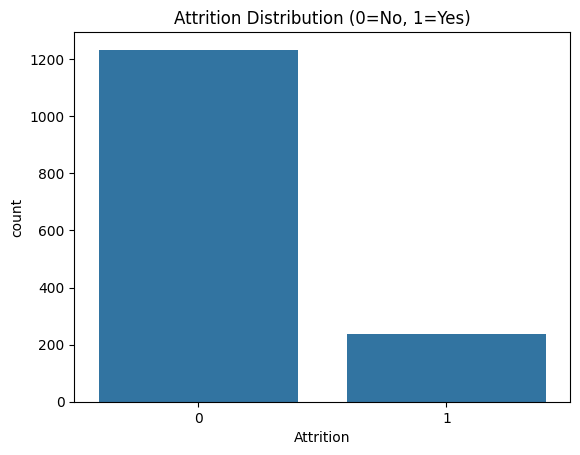

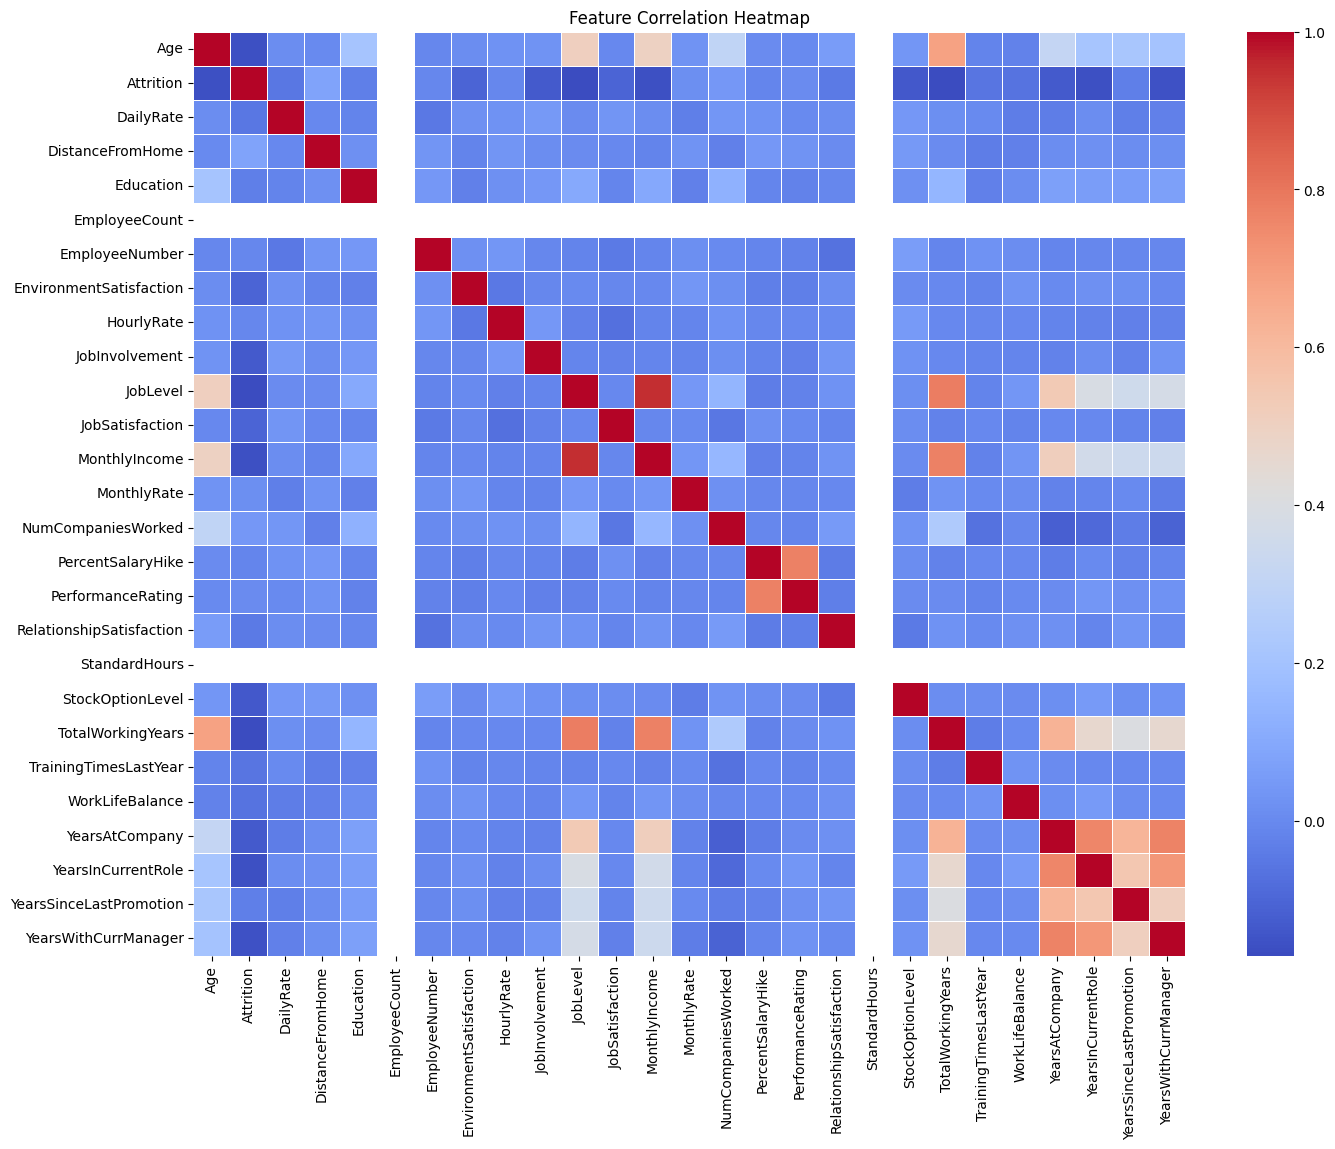


Categorical columns to encode: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Training samples: 1176, Testing samples: 294

Logistic Regression Performance:
Accuracy: 0.8741
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294


Random Forest Classifier Performance:
Accuracy: 0.8299
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294



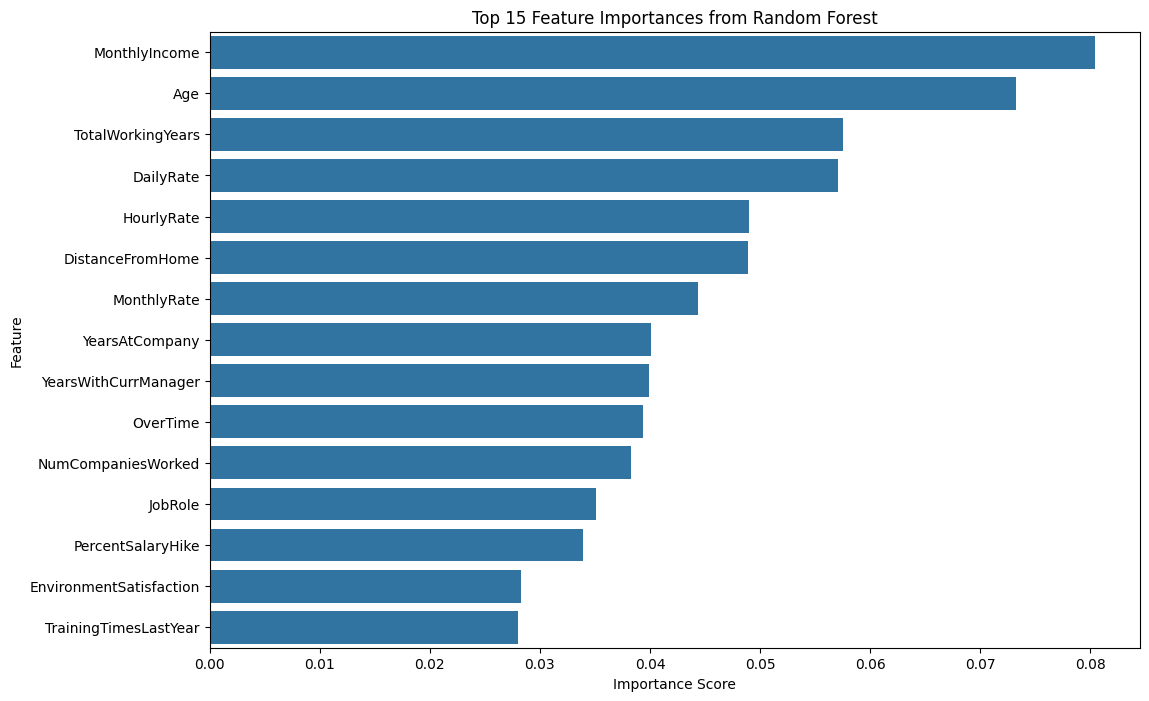

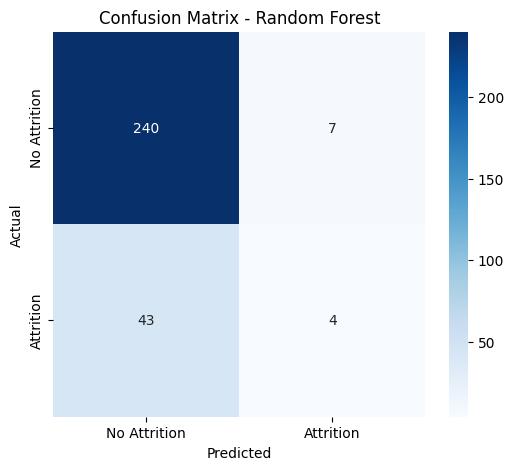

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset
file_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print(df.head())

# Step 2: Encode target variable first to avoid errors in correlation
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Step 3: Exploratory Data Analysis (EDA)
print("\nDataset info:")
print(df.info())

print("\nChecking for missing values:")
print(df.isnull().sum())

print("\nTarget variable distribution:")
print(df['Attrition'].value_counts())

# Visualize target variable distribution
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution (0=No, 1=Yes)')
plt.show()

# Step 4: Correlation Heatmap (only numeric columns)
plt.figure(figsize=(16,12))
numeric_df = df.select_dtypes(include=[np.number])  # Select numeric only to avoid error
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 5: Data Preprocessing
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns to encode: {categorical_cols}")

# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Drop irrelevant columns
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = df['Attrition']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Step 7: Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Step 8: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 9: Feature Importance visualization
importances = rf_model.feature_importances_
features = X.columns

feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=feat_importances[:15], y=feat_importances.index[:15])
plt.title('Top 15 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Step 10: Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()